In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from collections import Counter
from lightgbm import LGBMClassifier

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import gensim
import os
import seaborn as sns

In [3]:
df = pd.read_csv("../data/train_with_label.csv")

In [4]:
df['target_probe'] = [getattr(i, f"probe_{int(i.department_id)}") for i in df.itertuples()]
df['accuracy'] = df.label == df.department_id

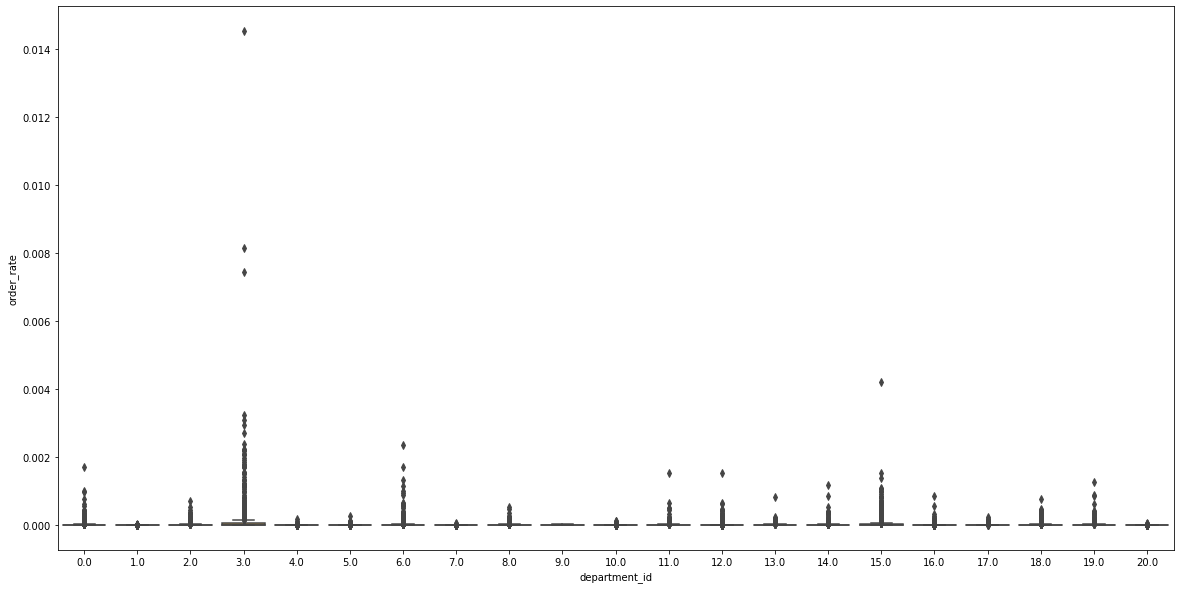

In [5]:
"""
- 11,19 -> 0
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
"""
plt.figure(figsize=(20, 10))

ax = sns.boxplot(x="department_id", y="order_rate", data=df)

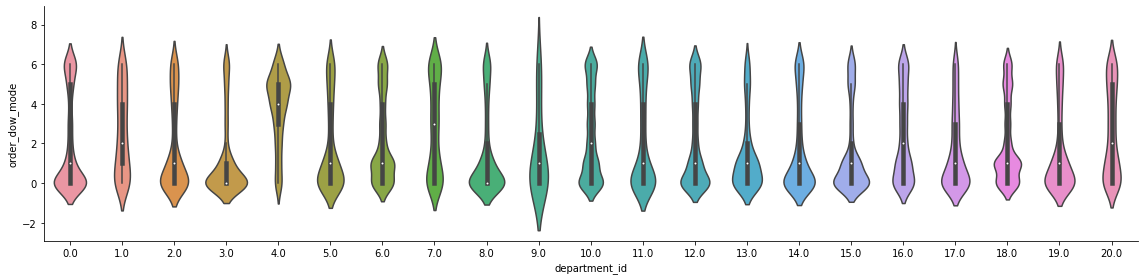

In [61]:
"""
- 11,19 -> 0
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
"""

ax = sns.factorplot(x="department_id", y="order_dow_mode", data=df, kind="violin", size=4, aspect=4)

In [70]:
from ipywidgets import interact
from itertools import chain
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

df["words"] = df["product_name"].apply(lambda words : words.lower().replace(",", "").replace("&", "").split(" "))

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 200)
pd.set_option("display.max_colwidth", 100)

@interact(department_id=(0, 20), label=(0,20))
def plot(department_id, label):
    words = sum(df[(df.department_id==department_id) & (df.label==label)].words.tolist(), [])
    counter = Counter(words)
    pprint(counter.most_common(30))
    pprint(df[(df.department_id==department_id) & (df.label==label)].product_name)

interactive(children=(IntSlider(value=10, description='department_id', max=20), IntSlider(value=10, descriptio…

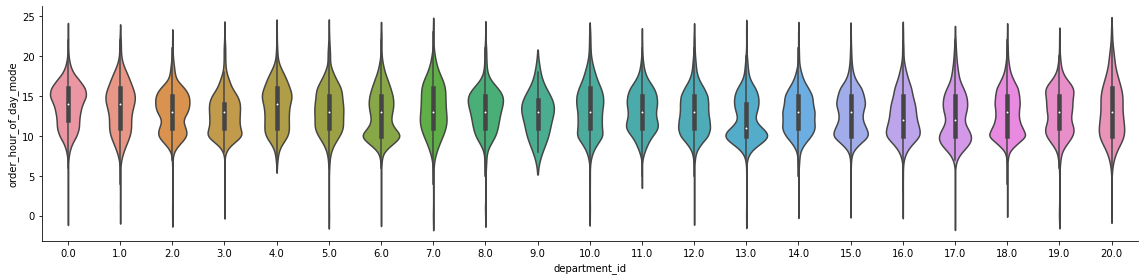

In [62]:
"""
- 11,19 -> 0
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
- 5 -> 12
- 9 -> ...
- 1,17 -> 10
- 13 -> 18
- 20 -> 6,15,18
"""

ax = sns.factorplot(x="department_id", y="order_hour_of_day_mode", data=df, kind="violin", size=4, aspect=4)